In [1]:
import numpy as np
from clones.data.experiments import Experiment
from clones.annotation.classifiers import CellClassifier
from clones.annotation.bayesian import BayesianClassifier

%matplotlib inline

# Load stack and aggregate measurements

In [76]:
experiment_path = '/Users/Sebi/Documents/grad_school/research/ratio/data/published/clones/yanE833/'

# load experiment
experiment = Experiment(experiment_path)

# initialize stack
ind = 12
stack = experiment.load_stack(experiment.stack_ids[ind], full=True)

# aggregate measurement data
measurements = stack.aggregate_measurements(raw=False)

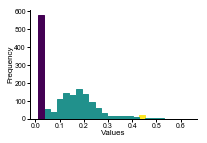

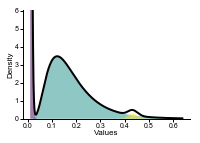

In [77]:
data = measurements
data = data[data.selected]
#data = data[data.b.between(*np.percentile(data.b.values, [0, 100]))]

classify_on = 'r'
bayesian_classifier = BayesianClassifier(data[classify_on].values, classify_on=classify_on, n=3)
bayesian_classifier.show()
bayesian_classifier.show_pdf()

In [78]:
classify_on = 'r'
X = data[classify_on].values

ns = range(2, 10)
classifiers = []
for n in ns:
    classifier = BayesianClassifier(X, classify_on=classify_on, n=n)
    classifiers.append(classifier)

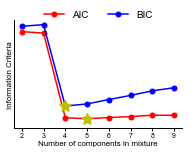

In [591]:
BIC_scores = [c.BIC for c in classifiers]
AIC_scores = [c.AIC for c in classifiers]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(3, 2))
ax.plot(ns, AIC_scores, '.-r', label='AIC', markersize=10)
ax.plot(ns, BIC_scores, '.-b', label='BIC', markersize=10)
ax.set_xlabel('Number of components in mixture')
ax.set_ylabel('Information Criteria')
ax.set_xticks(ns)
ax.set_yticks([])
ax.legend(frameon=False, bbox_to_anchor=(0., 1.02, 1., .102), loc='upper center', ncol=2, mode="center", borderaxespad=0.)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


bic_ind = np.argmin(BIC_scores)
aic_ind = np.argmin(AIC_scores)
ax.scatter(ns[bic_ind], BIC_scores[bic_ind], s=150, facecolor='y', lw=1, marker=(5, 1), zorder=99)
ax.scatter(ns[aic_ind], AIC_scores[aic_ind], s=150, facecolor='y', lw=1, marker=(5, 1), zorder=99)

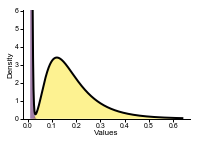

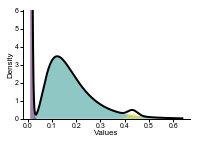

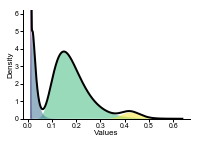

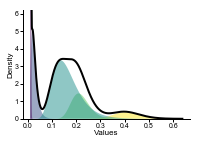

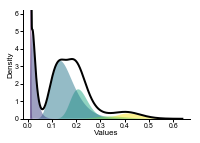

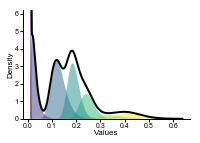

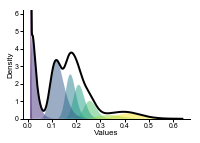

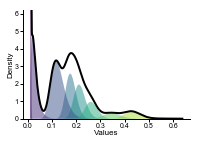

In [80]:
for classifier in classifiers:
    classifier.show_pdf()

In [86]:
distribution.probability

<function LogNormalDistribution.probability>

In [87]:
X

array([0.1449549 , 0.20208128, 0.25945451, ..., 0.14333827, 0.16906288,
       0.4191908 ])

In [264]:
import numpy as np
import matplotlib.pyplot as plt

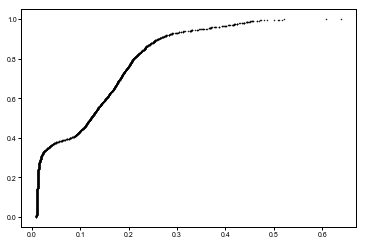

In [123]:
plt.plot(support, empirical_cdf, '.k', markersize=1)

In [376]:
evaluate_empirical_cdf = lambda X: (np.sort(X), np.linspace(0, 1, len(X), endpoint=False))

def evaluate_distribution_cdf(distribution, support):
    density = distribution.probability(support)
    return np.cumsum(density) / density.sum()



In [377]:
weights = np.exp(classifier.model.weights)

distribution_cdfs = np.vstack([evaluate_distribution_cdf(d, support) for d in classifier.model.distributions])

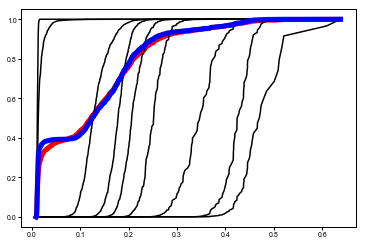

In [600]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(support, empirical_cdf, '-r', lw=5)

for distribution_cdf in distribution_cdfs:
    ax.plot(support, distribution_cdf, '-k')

    
model_cdf = (distribution_cdfs * weights.reshape(-1, 1)).sum(axis=0)
ax.plot(support, model_cdf, '-b', lw=5)

In [601]:
import scipy.stats as st

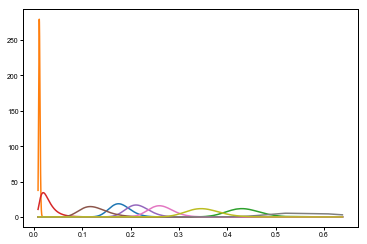

In [604]:
fig, ax = plt.subplots()
for density in densities:
    ax.plot(support, density)

In [379]:
def jensen_shannon_distance(x, y):
    return np.sqrt(0.5*(st.entropy(x, y, base=2) + st.entropy(y, x, base=2)))

In [593]:
support, empirical_cdf = evaluate_empirical_cdf(X)

#support = np.linspace(0, 1, 100)[1:]
densities = np.vstack([dist.probability(support) for dist in classifier.model.distributions])
densities[densities<1e-250] = 1e-250
yy, xx = np.meshgrid(*(np.arange(classifier.n),)*2)
xxd = densities[xx].reshape(-1, densities.shape[-1])
yyd = densities[yy].reshape(-1, densities.shape[-1])
distance_matrix = np.array([jensen_shannon_distance(x, y) for x, y in zip(xxd, yyd)]).reshape(*xx.shape)


num_mergers = classifier.n - 3
tri_ind = np.triu_indices(len(densities), k=1)
sort_ind = np.argsort(distance_matrix[tri_ind])
ordered_triu = [indices[sort_ind][:num_mergers] for indices in tri_ind]
rank_order = np.arange(sort_ind.size)

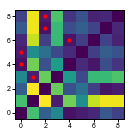

In [594]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(distance_matrix)
ax.invert_yaxis()


#ax.scatter(*np.triu_indices(len(densities), k=1))

plt.scatter(*ordered_triu, c='r', s=10, cmap=plt.cm.viridis_r)

In [598]:
pair = [indices[sort_ind][0] for indices in tri_ind]
pair

[0, 4]

array([[7.78901812e-131, 9.39276508e-131, 1.44040536e-128, ...,
        6.22232988e-017, 2.71446061e-022, 4.81848763e-024],
       [3.00610682e-176, 3.80998259e-176, 2.22926127e-173, ...,
        9.42914986e-014, 4.15464790e-019, 6.95607854e-021]])

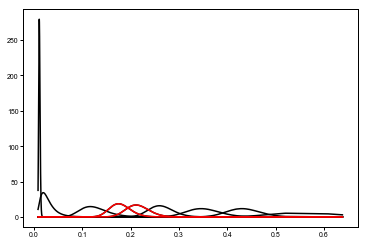

In [609]:
fig, ax = plt.subplots()


for density in densities:
    ax.plot(support, density, '-k')

for density in densities[pair]:
    ax.plot(support, density, '-r')


In [ ]:
"""
write procedure to sequentially merge distributions by adding weighted (? not sure) PDFs together iteratively & recomputing distance matrix
"""

In [583]:
mean = np.trapz(support*density, x=support)

In [ ]:
np.sqrt(0.5*(st.entropy(x, y, base=2) + st.entropy(y, x, base=2)))

In [315]:
yyd.shape

(81, 1681)

In [304]:
i, j = 0, 1

for _ in range(81):
    jensen_shannon_distance(xxd[i, j, :], yyd[i, j, :])

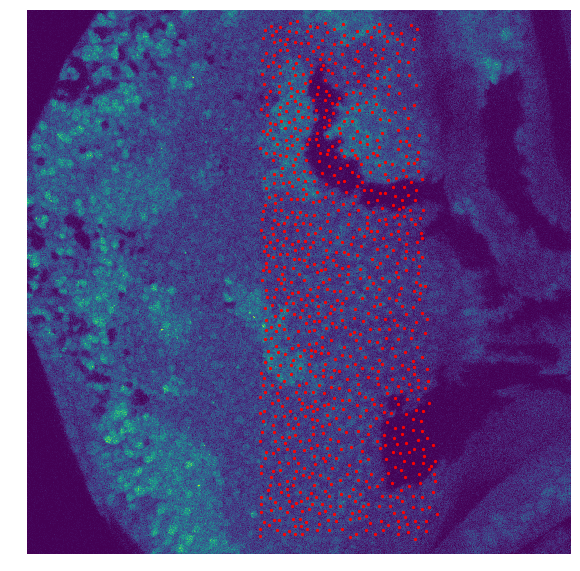

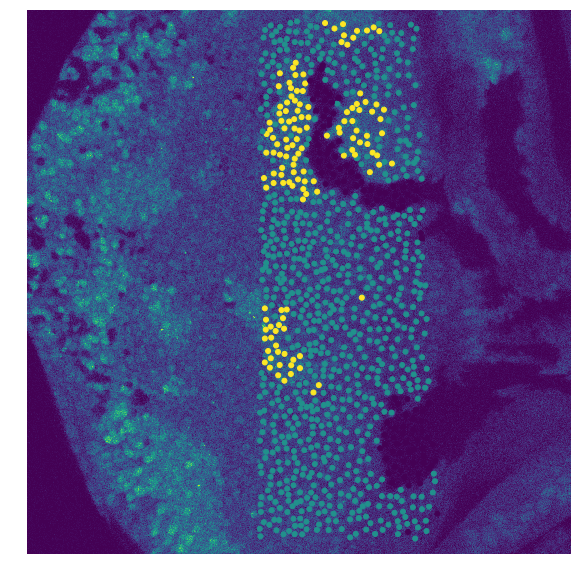

In [361]:
layer_id = 3
layer = stack[layer_id]

layer_data = data[data.layer==layer_id]
layer_pts = layer_data[['centroid_x', 'centroid_y']].values

fig0 = layer.get_channel('r').show(segments=False)
fig1 = layer.get_channel('r').show(segments=False)

ax0 = fig0.axes[0]
ax0.scatter(*layer_pts.T, s=5, c='r')
ax1 = fig1.axes[0]

genotypes = bayesian_classifier(layer_data)
ax1.scatter(*layer_pts.T, s=25, c=genotypes)

In [319]:
ch = layer.get_channel('r')

In [321]:
px = ch.im.ravel()

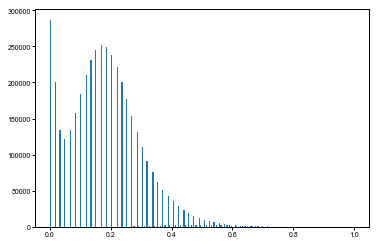

In [327]:
_ = plt.hist(px, bins=np.linspace(0, 1, 2**8))

In [323]:
import matplotlib.pyplot as plt

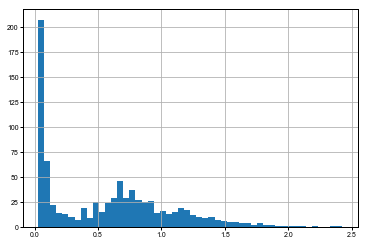

In [137]:
_ = layer_data.r_normalized.hist(bins=50)

In [174]:
from pomegranate import GeneralMixtureModel, LogNormalDistribution, PoissonDistribution, GammaDistribution

In [202]:
class GammaClassifier(BayesianClassifier):
    @staticmethod
    def _fit(values, n=3):
        """
        Fit log-normal mixture model using likelihood maximization.

        Args:

            values (np.ndarray[float]) - 1D array of values

            n (int) - number of log-normal distributions

        Returns:

            model (pomegranate.GeneralMixtureModel)

        """
        x = values.reshape(-1, 1)
        args = (GammaDistribution, n, x)
        kwargs = dict(n_init=1000)
        return GeneralMixtureModel.from_samples(*args, **kwargs)

([array([5., 8., 5., 9., 3., 3., 4., 2., 7., 4.]),
  array([3., 6., 9., 2., 4., 6., 8., 6., 3., 3.]),
  array([10.,  8., 12.,  8., 17., 14.,  9.,  4.,  8., 10.])],
 array([0.00357573, 0.10258446, 0.20159319, 0.30060192, 0.39961065,
        0.49861937, 0.5976281 , 0.69663683, 0.79564556, 0.89465429,
        0.99366302]),
 <a list of 3 Lists of Patches objects>)

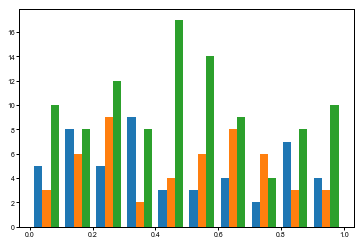

In [211]:
plt.hist([np.random.random(50), np.random.random(50), np.random.random(100)])

In [34]:
#pts = measurements[['centroid_x', 'centroid_y']].values



In [70]:
import numpy as np

In [86]:
data = measurements[measurements.selected]

# Fit cell classifier

In [57]:
# define groups (dictionary of {cluster_id: group_id} pairs)
groups = {0:0, 1:1, 2:1, 3:1, 4:2, 5:2} # e.g. 6 clusters --> 3 groups

# fit classifier
classifier = CellClassifier.from_measurements(measurements, classify_on='r_normalized', groups=groups, log=False)

# Visualize classifier

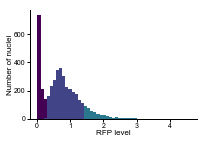

In [58]:
classifier.show()

In [88]:
from clones.annotation.bayesian import BayesianClassifier

In [89]:
bayesian_classifier = BayesianClassifier(x.r_normalized.values, classify_on='r')

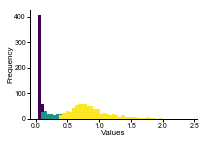

In [90]:
bayesian_classifier.show()

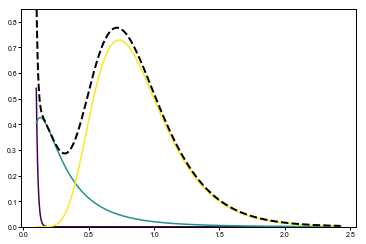

In [91]:
bayesian_classifier.show_pdf()

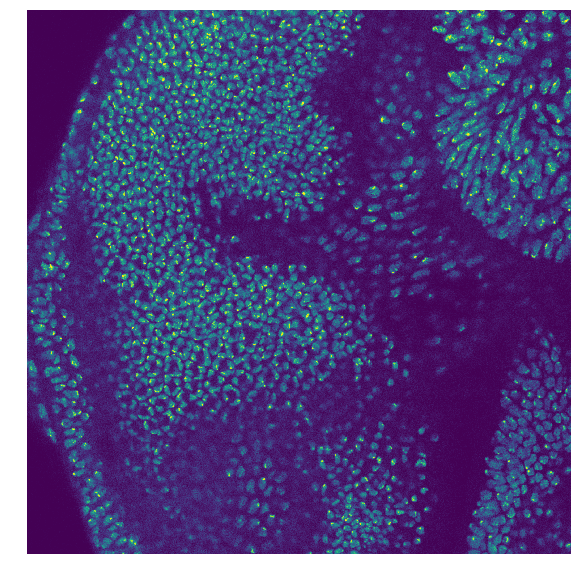

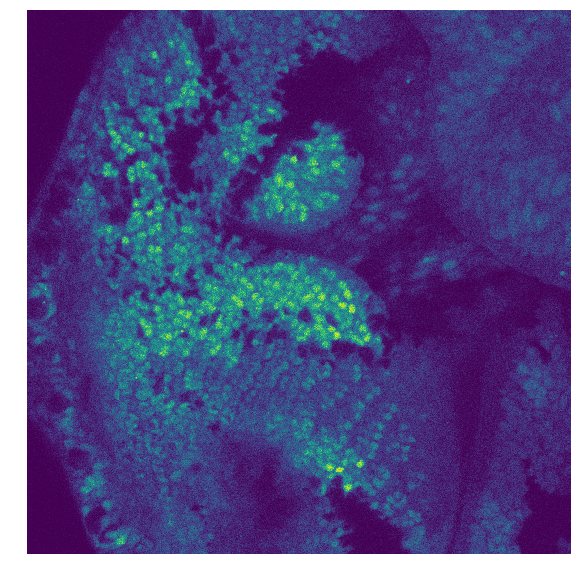

In [55]:
layer=stack[3]
_ = layer.get_channel('b').show(segments=False)
_ = layer.get_channel('r').show(segments=False)



In [ ]:
"""
TODO:

1. make sure only "included" measurements are being passed to classifier
2. check that low-DAPI cells (bleeding from other layers) arent screwing things up
3.

"""

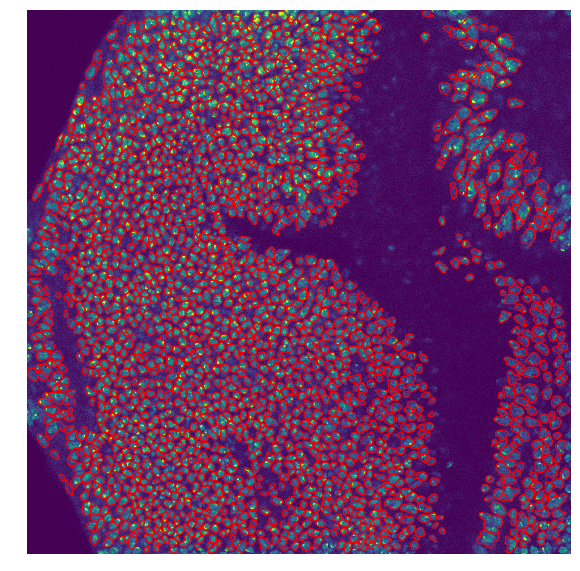

In [70]:
_ = layer.get_channel('b').show(segments=True)